🏆 Predicting Driver Champions (2025–2029)...


,season,driver,champion_prob
0,2025,Oscar Piastri,0.40
1,2026,Charles Leclerc,0.27
2,2027,Charles Leclerc,0.41
3,2028,Oscar Piastri,0.25
4,2029,Oscar Piastri,0.96


C:\Users\Sinchan\AppData\Local\Temp\ipykernel_47316\2510170587.py:42: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\f1-champion-predictor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


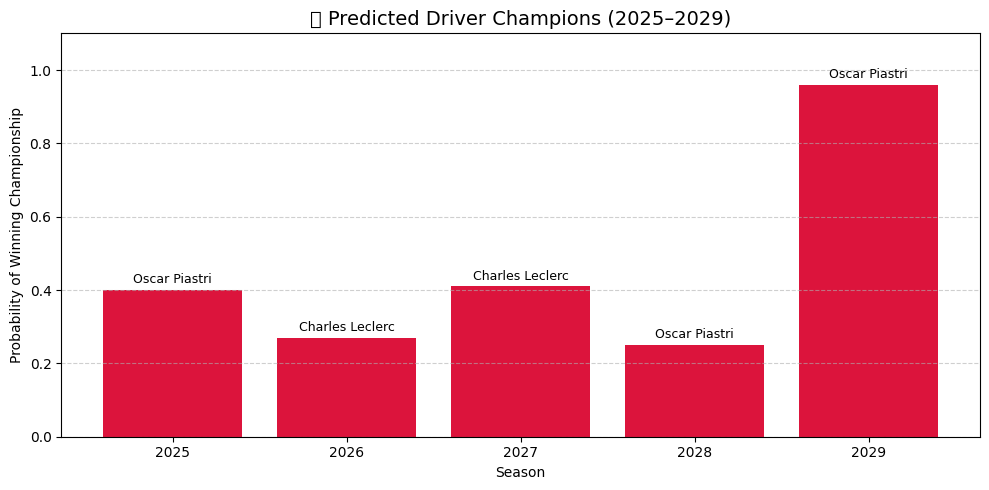


🏁 Predicting Constructor Champions (2025–2029)...


,season,constructor,champion_prob
0,2025,Mclaren,0.990000
1,2026,Ferrari,0.132500
2,2027,McLaren,0.379500
3,2028,Ferrari,0.006667
4,2029,Ferrari,0.399500


C:\Users\Sinchan\AppData\Local\Temp\ipykernel_47316\2510170587.py:42: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\f1-champion-predictor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


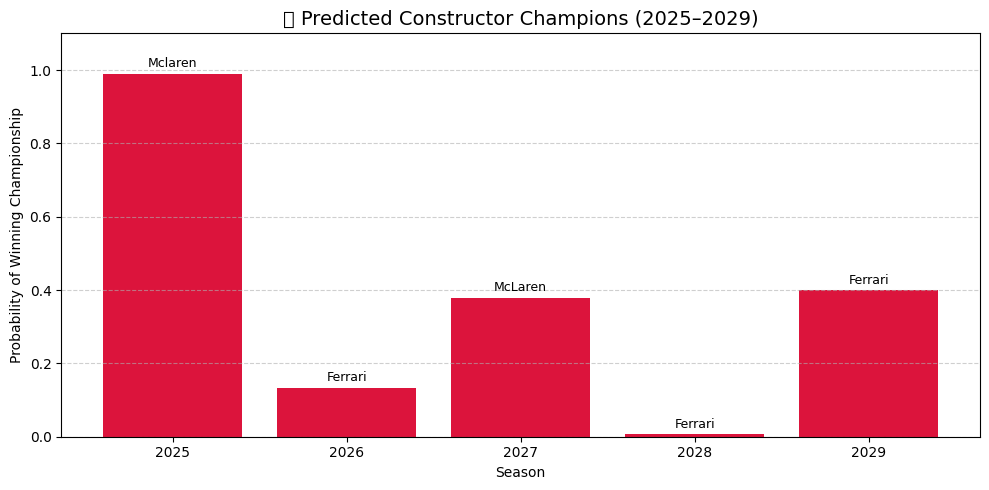


✅ Predictions saved to: data/predictions/


In [7]:
# ============================================
# Phase 4 - Champion Prediction Notebook
# File: notebooks/04_champion_prediction.ipynb
# ============================================

import pandas as pd
import os
import sys
import joblib
import matplotlib.pyplot as plt

# =========================
# Setup Path and Imports
# =========================

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from src.model import predict_champions

# =========================
# Helper: Plot Predictions
# =========================

def plot_predictions(pred_df, entity="driver"):
    """
    Plots champion predictions as a bar chart.
    """
    plt.figure(figsize=(10, 5))
    bars = plt.bar(pred_df['season'].astype(str), pred_df['champion_prob'], color='crimson')

    for bar, label in zip(bars, pred_df[entity]):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, label, ha='center', va='bottom', fontsize=9)

    plt.title(f"🏆 Predicted {entity.capitalize()} Champions (2025–2029)", fontsize=14)
    plt.ylabel("Probability of Winning Championship")
    plt.xlabel("Season")
    plt.ylim(0, 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# =========================
# Load Future Data
# =========================

future_driver_df = pd.read_csv("../data/features/driver_features_future.csv")
future_constructor_df = pd.read_csv("../data/features/constructor_features_future.csv")

# =========================
# Load Trained Models
# =========================

driver_model = joblib.load("../models/driver_model.pkl")
constructor_model = joblib.load("../models/constructor_model.pkl")

# =========================
# Predict Driver Champions
# =========================

print("🏆 Predicting Driver Champions (2025–2029)...")
driver_predictions = predict_champions(driver_model, future_driver_df, entity="driver")
display(driver_predictions)
plot_predictions(driver_predictions, entity="driver")

# =========================
# Predict Constructor Champions
# =========================

print("\n🏁 Predicting Constructor Champions (2025–2029)...")
constructor_predictions = predict_champions(constructor_model, future_constructor_df, entity="constructor")
display(constructor_predictions)
plot_predictions(constructor_predictions, entity="constructor")

# =========================
# Save Predictions to CSV
# =========================

os.makedirs("../data/predictions", exist_ok=True)
driver_predictions.to_csv("../data/predictions/driver_champion_predictions.csv", index=False)
constructor_predictions.to_csv("../data/predictions/constructor_champion_predictions.csv", index=False)

print("\n✅ Predictions saved to: data/predictions/")
